<a href="https://colab.research.google.com/github/fredymendezbustamante/ANALITICA_DE_DATOS/blob/main/EJERCICIO_LABORATORIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FREDY ALEXANDER MENDEZ BUSTAMANTE.
#COD: 816539


# EJERCICIO LABORATORIO

Consultar el funcionamiento (modelo matemático,función de costo y optimización)
de los siguientes algorirmos segun su implementación en el paquete Scikit-Learn de Python:

# 1) Sklearn.linear_model.LinearRegression.

 Es un conjunto de métodos destinados a la regresión en los que se espera que el valor objetivo sea una combinación lineal de las características. En notación matemática, si: $\hat {y}$ es el valor predicho.

$$\hat {y} (w, x) = w_0 + w_1 x_1 + ... + w_p x_p $$

En todo el módulo, designamos el vector: $w = (w_1,..., w_p)$ `como` `coef_` y:  $w_0$  como `intercep_`.


#Mínimos cuadrados ordinarios.

LinearRegression se ajusta a un modelo lineal con coeficientes $w = (w_1,..., w_p)$ para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal. Matemáticamente resuelve un problema de la forma:

$$\min_ {w} || X w - y || _2 ^ 2 $$




$$R S S=\sum_{i=1}^{n}\left(y_{i}-f\left(x_{i}\right)\right)^{2}$$
donde $n$ es el número de muestras, $y_{i}$ es el valor real observado y $f\left(x_{i}\right)$ el valor predicho. Esta expresión es la función de coste de la regresión lineal.

Scikit-Learn implementa este algoritmo en la clase sklearn.linear_model. LinearRegressiond . Veámoslo en funcionamiento con el dataset de característica del diabetes en su conjunto de datos.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


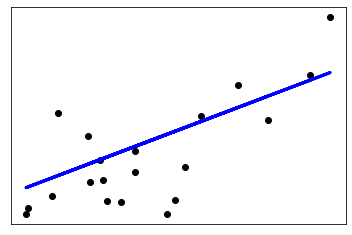

In [21]:
# Ejemplo de regresión lineal.
 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Este ejemplo utiliza la única primera característica del diabetes conjunto de datos, para ilustrar una gráfica bidimensional de esta técnica de regresión. La línea recta se puede ver en el gráfico, que muestra cómo la regresión lineal intenta dibujar una línea recta que minimizará mejor la suma residual de cuadrados entre las respuestas observadas en el conjunto de datos y las respuestas predichas por la aproximación lineal.

También se calculan los coeficientes, la suma de cuadrados residual y el coeficiente de determinación.

# 2) Sklearn.lineal_model.Rige

La Regresión Rigde, también denominada regresión contraída o Tikhonov regularization, regulariza el modelo resultante imponiendo una penalización al tamaño de los coeficientes de la relación lineal entre las características predictivas y la variable objetivo. En este caso, los coeficientes calculados minimizan la suma de los cuadrados de los residuos penalizada al añadir el cuadrado de la norma L2 del vector formado por los coeficientes:

\begin{equation}
\text {RSS}_{\text {ridge}}=\sum_{i=1}^{n}\left(y_{i}-f\left(x_{i}\right)\right)^{2}+\lambda \sum_{j=1}^{p} \beta_{j}^{2}
\end{equation}

donde $\lambda$ es un parámetro que controla el grado de penalización: cuanto mayor éste, los coeficientes serán menores resultando más robustos a la colinealidad. Cuando a es igual a cero, Ridge es equivalente a la regresión lineal.

La norma $L 2$ es equivalente a la distancia Euclidea del vector al centro de coordenadas, por lo que la penalización es proporcional a los cuadrados de los coeficientes. Por poner un ejemplo sencillo, si el vector de coordenadas es (2,3) -supongamos que estamos trabajando solo con dos caracteristicas predictivas-, la "norma $2^{\prime \prime}(L 2)$ de este vector sería la distancia del punto (2,3) $\mathrm{a}(0,0),$ es decir, la raiz cuadrada de $2^{2}+3^{2}: 3.16$ aproximadamente. La penalización sería el cuadrado de este valor: 10 (resultante de sumar los cuadrados de los coeficientes).
Nótese que el término de regularización solo se añade a la función de coste durante el entrenamiento: la evaluación del rendimiento del modelo se realiza considerando solo la función
de coste sin regularizar.
Scikit-Learn implementa este algoritmo en la clase sklearn.linear_model.Ridged (entrenado usando la ecuación normal), aunque también puede entrenarse via Gradient Descent usando la clase class sklearn.linear_model.SGDRegressord y especificando penalización I2.

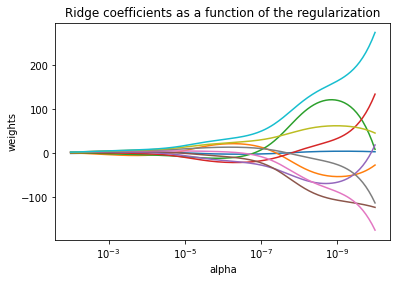

In [22]:
# ejemplo 
#Trazar los coeficientes de Ridge en función de la regularización

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Muestra el efecto de la colinealidad en los coeficientes de un estimador.

RidgeLa regresión es el estimador utilizado en este ejemplo. Cada color representa una característica diferente del vector de coeficientes, y esto se muestra en función del parámetro de regularización.

Este ejemplo también muestra la utilidad de aplicar la regresión de Ridge a matrices muy mal condicionadas. Para tales matrices, un ligero cambio en la variable objetivo puede causar grandes variaciones en los pesos calculados. En tales casos, es útil establecer una cierta regularización (alfa) para reducir esta variación (ruido).

Cuando alfa es muy grande, el efecto de regularización domina la función de pérdida al cuadrado y los coeficientes tienden a cero. Al final del camino, a medida que alfa tiende a cero y la solución tiende a los mínimos cuadrados ordinarios, los coeficientes muestran grandes oscilaciones. En la práctica es necesario sintonizar alfa de tal forma que se mantenga un equilibrio entre ambos.

# 3). Sklearn.linear_model.Lasso

Lasso -del inglés Least Absolute Shrinkage and Selection Operator- es un modelo lineal que penaliza el vector de coeficientes añadiendo su norma $L 1$ (basada en la distancia Manhattan) a la función de coste:
$$
R S S_{\text {lasso}}=\sum_{i=1}^{n}\left(y_{i}-f\left(x_{i}\right)\right)^{2}+\lambda \sum_{j=1}^{p}\left|\beta_{j}\right|
$$
Lasso tiende a generar "coeficientes dispersos": vectores de coeficientes en los que la mayoria de ellos toman el valor cero. Esto quiere decir que el modelo va a ignorar algunas de las caracteristicas predictivas, lo que puede ser considerado un tipo de selección automática de caracteristicas. El incluir menos caracteristicas supone un modelo más sencillo de interpretar que puede poner de manifiesto las caracteristicas más importantes del conjunto de datos. En el caso de que exista cierta correlación entre las caracteristicas predictivas, Lasso tenderá a escoger una de ellas al azar.
Esto significa que, aunque Ridge es una buena opción por defecto, si sospechamos que la distribución de los datos viene determinada por un subconjunto de las caracteristicas predictivas, Lasso podría devolver mejores resultados.
Scikit-Learn implementa este algoritmo en la clase sklearn.linear_model.Lassod . Tal y como ocurría con Ridge, también puede entrenarse via Gradient Descent usando la clase class sklearn.linear_model.SGDRegressord y especificando penalización 11 en este caso.

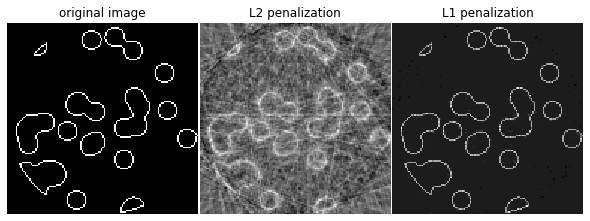

In [23]:
# Ejemplo Detección compresiva: reconstrucción de tomografía con L1 antes (Lasso) 

import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """ Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """ Synthetic binary data """
    rs = np.random.RandomState(0)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.) ** 2 + (y - l / 2.) ** 2 < (l / 2.) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))


# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l // 7)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

plt.show()

Este ejemplo muestra la reconstrucción de una imagen a partir de un conjunto de proyecciones paralelas, adquiridas a lo largo de diferentes ángulos. Dicho conjunto de datos se adquiere en tomografía computarizada (TC).

Sin ninguna información previa sobre la muestra, el número de proyecciones necesarias para reconstruir la imagen es del orden del tamaño lineal lde la imagen (en píxeles). Por simplicidad, consideramos aquí una imagen dispersa, donde solo los píxeles en el límite de los objetos tienen un valor distinto de cero. Dichos datos podrían corresponder, por ejemplo, a un material celular. Sin embargo, tenga en cuenta que la mayoría de las imágenes son escasas en una base diferente, como las ondas de Haar. Solo l/7se adquieren proyecciones, por lo que es necesario utilizar información previa disponible sobre la muestra (su escasez): este es un ejemplo de detección por compresión .

La operación de proyección de tomografía es una transformación lineal. Además del término de fidelidad de datos correspondiente a una regresión lineal, penalizamos la norma L1 de la imagen para dar cuenta de su escasez. El problema de optimización resultante se llama Lazo . Usamos la clase sklearn.linear_model.Lasso, que usa el algoritmo de descenso de coordenadas. Es importante destacar que esta implementación es más eficiente computacionalmente en una matriz dispersa que el operador de proyección que se usa aquí.

La reconstrucción con penalización L1 da un resultado con cero error (todos los píxeles se etiquetan correctamente con 0 o 1), incluso si se agregó ruido a las proyecciones. En comparación, una penalización L2 ( sklearn.linear_model.Ridge) produce una gran cantidad de errores de etiquetado para los píxeles. Se observan artefactos importantes en la imagen reconstruida, contrario a la penalización L1. Nótese en particular el artefacto circular que separa los píxeles en las esquinas, que han contribuido a menos proyecciones que el disco central.

# 4) Sklearn.linear_model.ElasticNet

Elastic Net es un modelo de regresión lineal que normaliza el vector de coeficientes con las normas L1 y L2. Esto permite generar un modelo en el que solo algunos de los coeficientes sean no nulos, manteniendo las propiedades de regularización de Ridge. La función de coste es equivalente a:
$$
R S S_{\text {elastic net}}=\sum_{i=1}^{n}\left(y_{i}-f\left(x_{i}\right)\right)^{2}+\alpha\left(\lambda \sum_{j=1}^{p} \beta^{2}+(1-\lambda) \sum_{j=1}^{p}\left|\beta_{j}\right|\right)
$$
El parámetro $\lambda$ regula el peso dado a la regularización impuesta por Ridge y por Lasso. Desde este punto de vista Elastic Net es un superconjunto de ambos modelos.

En el caso de que exista cierta colinealidad entre varias caracteristicas predictivas, Elastic Net tenderá a escoger una o todas (aun con coeficientes menores) en función de cómo haya sido parametrizado.
Scikit-Learn implementa este algoritmo en la clase sklearn.linear_model. ElasticNet.



Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


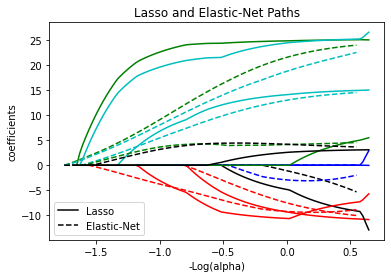

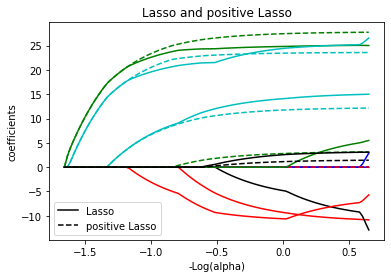

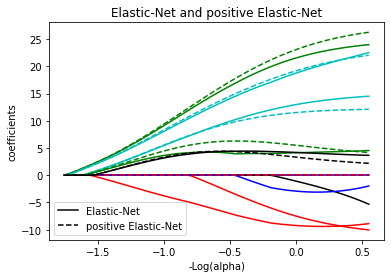

In [24]:
# Ejemplo Lasso and ElasticNet

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

Lazo y red elástica (penalización L1 y L2) implementados mediante descenso coordinado.

Se puede obligar a que los coeficientes sean positivos.

# 5) Sklearn.linear_model.kernelRidge

La regresión de la cresta del núcleo (KRR) [M2012] combina la regresión y la clasificación de la cresta (mínimos cuadrados lineales con regularización de norma I2) con el truco del núcleo. De este modo, aprende una función lineal en el espacio inducida por el núcleo respectivo y los datos. Para los núcleos no lineales, esto corresponde a una función no lineal en el espacio original.

La forma del modelo aprendido por KernelRidgees idéntica a la de soporte de regresión vectorial ( $\mathrm{svR}$ ). sin embargo, se utilizan diferentes funciones de pérdida: KRR utiliza la pérdida de error al cuadrado mientras que la regresión vectorial de soporte utiliza\epsilonPérdida insensible, ambas combinadas con regularización I2. A diferencia de svR, el ajuste KernelRidgese puede realizar en forma cerrada $y$, por lo general, es más rápido para conjuntos de datos de tamaño mediano. Por otro lado, el modelo aprendido no es escaso y, por lo tanto, más lento que svR, que aprende un modelo escaso para $\epsilon>0,$ en el momento de la predicción.

La siguiente figura compara KernelRidgey svren un conjunto de datos artificial, que consiste en una función objetivo sinusoidal y un fuerte ruido agregado a cada quinto punto de datos. Se traza el modelo aprendido de KernelRidgey SVR, donde tanto la
complejidad / regularización como el ancho de banda del kernel RBF se han optimizado utilizando la búsqueda en cuadrícula. Las funciones aprendidas son muy similares; sin
embargo, el ajuste KernelRidgees aproximadamente siete veces más rápido que el ajuste SVR(ambos con búsqueda de cuadrícula). sin embargo, la predicción de 100000 valores objetivo es más de tres veces más rápida, svRya que ha aprendido un modelo escaso utilizando solo aproximadamente $1 / 3$ de los 100 puntos de datos de entrenamiento como vectores de soporte.



SVR complexity and bandwidth selected and model fitted in 0.745 s
KRR complexity and bandwidth selected and model fitted in 0.313 s
Support vector ratio: 0.320
SVR prediction for 100000 inputs in 0.133 s
KRR prediction for 100000 inputs in 0.282 s


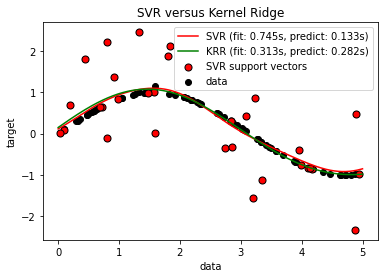

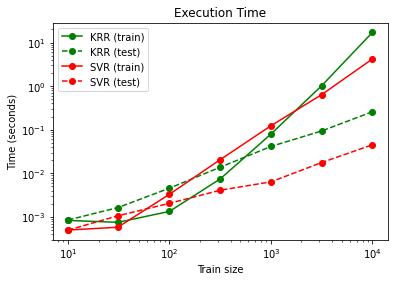

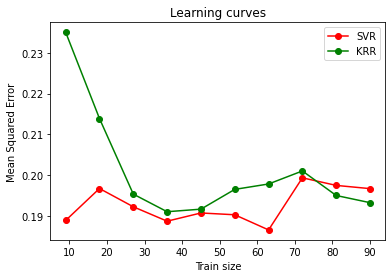

In [25]:
# Ejemplo Comparación de la regresión de la cresta del kernel y SVR

import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

Tanto la regresión de la cresta del núcleo (KRR) como la SVR aprenden una función no lineal empleando el truco del núcleo, es decir, aprenden una función lineal en el espacio inducida por el núcleo respectivo que corresponde a una función no lineal en el espacio original. Se diferencian en las funciones de pérdida (pérdida de cresta frente a pérdida insensible a épsilon). A diferencia de SVR, el ajuste de un KRR se puede realizar en forma cerrada y suele ser más rápido para conjuntos de datos de tamaño mediano. Por otro lado, el modelo aprendido no es escaso y, por lo tanto, más lento que el SVR en el momento de la predicción.

Este ejemplo ilustra ambos métodos en un conjunto de datos artificial, que consiste en una función objetivo sinusoidal y un fuerte ruido agregado a cada quinto punto de datos. La primera figura compara el modelo aprendido de KRR y SVR cuando tanto la complejidad / regularización como el ancho de banda del kernel RBF se optimizan mediante la búsqueda en cuadrícula. Las funciones aprendidas son muy similares; sin embargo, el ajuste de KRR es de aprox. siete veces más rápido que ajustar SVR (ambos con búsqueda de cuadrícula). Sin embargo, la predicción de 100000 valores objetivo es mucho más rápida con SVR, ya que ha aprendido un modelo escaso utilizando solo aprox. 1/3 de los 100 puntos de datos de entrenamiento como vectores de soporte.

La siguiente figura compara el tiempo de ajuste y la predicción de KRR y SVR para diferentes tamaños del conjunto de entrenamiento. La adaptación de KRR es más rápida que la SVR para conjuntos de entrenamiento de tamaño mediano (menos de 1000 muestras); sin embargo, para un entrenamiento más grande, las escalas de RVS son mejores. Con respecto al tiempo de predicción, SVR es más rápido que KRR para todos los tamaños del conjunto de entrenamiento debido a la escasa solución aprendida. Tenga en cuenta que el grado de escasez y, por lo tanto, el tiempo de predicción depende de los parámetros épsilon y C de la RVS.

# BIBLIOGRAFIAS.

https://scikit-learn.org/stable/modules/linear_model.html#elastic-net

https://www.interactivechaos.com/manual/tutorial-de-machine-learning/elastic-net

https://scikit-learn.org/stable/modules/kernel_ridge.html#id1